# Ensemble Methods - Random Forst

## Business Cases

Source: [Behavioral Risk Factor Surveillance System](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system)

In [67]:
import itertools

In [68]:
import matplotlib.pyplot as plt

In [69]:
import numpy as np

In [70]:
import pandas as pd

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Setup & Options

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [6]:
seed = 50

## Data Mining

In [ ]:
df = pd.read_csv('clean_data.csv')

In [24]:
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
1,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
2,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
3,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
4,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [8]:
labels = np.array(df.pop('label'))

In [9]:
labels

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    labels,
                                                    stratify = labels,
                                                    test_size = .3,
                                                    random_state = seed)

In [25]:
X_train.shape

(69803, 313)

In [28]:
X_test.shape

(29916, 313)

In [29]:
y_train.shape

(69803,)

In [30]:
y_test.shape

(29916,)

## Data Cleaning

In [11]:
X_train = X_train.fillna(X_train.mean())

In [12]:
X_test = X_test.fillna(X_test.mean())

## Feature Selection

In [13]:
n_nodes = []
max_depths = []

In [14]:
clf = RandomForestClassifier(n_estimators = 100,
                             random_state = seed,
                             max_features = 'sqrt',
                             n_jobs = 1,
                             verbose = 1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [15]:
for independent_tree in clf.estimators_:
    tree = independent_tree.tree_
    n_nodes.append(tree.node_count)
    max_depths.append(tree.max_depth)

In [16]:
'Average number of nodes: {}'.format(int(np.mean(n_nodes)))

'Average number of nodes: 13396'

In [17]:
'Average maximum depth: {}'.format(int(np.mean(max_depths)))

'Average maximum depth: 46'

## Predictive Modelling

### Training Predictions

Predicting on training data is done to demonstrate overfitting.

In [18]:
training_predictions = clf.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [19]:
training_propabilities = clf.predict_proba(X_train)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


In [20]:
predictions = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [21]:
propabilities = clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


## Evaluation

In [59]:
def plot(base_fpr, base_tpr, model_fpr, model_tpr):
    plt.figure(figsize=(8,6))
    plt.rcParams['font.size'] = 16
    
    plt.plot(base_fpr,
             base_tpr,
             'b',
             label='baseline')
    plt.plot(model_fpr,
             model_tpr,
             'r',
             label='model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()

In [63]:
def evaluate(predictions, propabilities, training_data_predictions, training_data_propabilities):
    print('predictions.shape: {}'.format(predictions.shape))
    print('propabilities.shape: {}'.format(propabilities.shape))
    print('training.predictions.shape: {}'.format(training_data_predictions.shape))
    print('training.propabilities.shape: {}'.format(training_data_propabilities.shape))
    stats = lambda recall, precision, roc: dict(recall=recall, precision=precision, roc=roc)
    
    baseline = stats(recall_score(y_test, [1 for _ in range(len(y_test))]),
                     precision_score(y_test, [1 for _ in range(len(y_test))]),
                     0.5)

    results = stats(
        recall_score(y_test, predictions),
        precision_score(y_test, predictions),
        roc_auc_score(y_test, propabilities))

    print('\t' + str(baseline))
    print('\t' + str(results))

#    training_results = stats(
#        recall_score(X_test, training_data_predictions),
#        precision_score(X_test, training_data_predictions),
#        roc_auc_score(X_test, training_data_propabilities))
#    print(training_results)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()}: \n\tBaseline: {round(baseline[metric], 2)} \n\tTest: {round(results[metric], 2)}')
    
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, propabilities)
    plot(base_fpr, base_tpr, model_fpr, model_tpr)

predictions.shape: (29916,)
propabilities.shape: (29916,)
training.predictions.shape: (69803,)
training.propabilities.shape: (69803,)
	{'recall': 1.0, 'precision': 0.813678299237866, 'roc': 0.5}
	{'recall': 0.9571522471448525, 'precision': 0.8813693966332514, 'roc': 0.8713709749100081}
Recall: 
	Baseline: 1.0 
	Test: 0.96
Precision: 
	Baseline: 0.81 
	Test: 0.88
Roc: 
	Baseline: 0.5 
	Test: 0.87


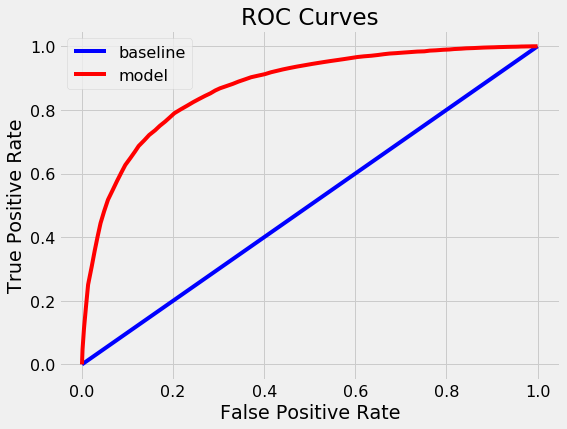

In [64]:
evaluate(predictions, propabilities, training_predictions, training_propabilities)

In [77]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization


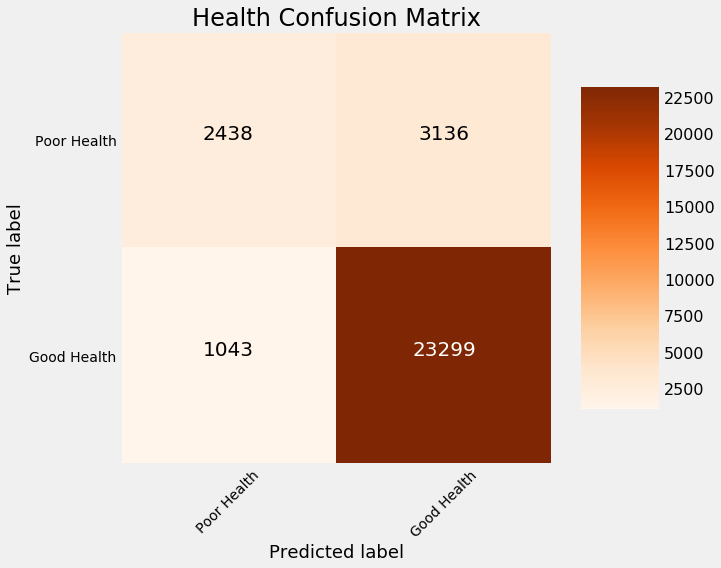

In [79]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')